In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#  to load the data
from keras.datasets import mnist
(train_x,train_y),(test_x,test_y)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f"Train Dataset :{train_x.shape}")
print(f"Test Dataset :{test_x.shape}")
print(f"Train Label :{train_y.shape}")
print(f"Test Label :{test_y.shape}")


Train Dataset :(60000, 28, 28)
Test Dataset :(10000, 28, 28)
Train Label :(60000,)
Test Label :(10000,)


In [ ]:
print(f"trian image size: {train_x[0].shape}") #train_x[0].shape


image size: (28, 28)


Text(0.5, 1.0, 'Label: 2')

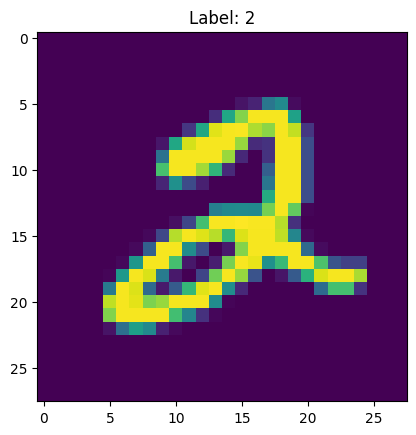

In [ ]:
# Plot the image
plt.imshow(train_x[5])
plt.title(f'Label: {train_y[5]}')
plt.axis('off')  # Optionally turn off the axis
plt.show()

In [ ]:
# Normalizatoin
X_train = train_x/255;
X_test = test_x/255;

In [ ]:
model=Sequential()
# to flatten the 2d data into one dimension
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100,activation='relu'))  # hidden layer with 100 perceptron
# model.add(Dense(100,activation='sigmoid'))  # hidden layer with 100 perceptron
# model.add(Dense(100,activation='tanh'))  # hidden layer with 100 perceptron
model.add(Dense(10,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,train_y,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3005 - accuracy: 0.9146 - val_loss: 0.1605 - val_accuracy: 0.9532
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1380 - accuracy: 0.9596 - val_loss: 0.1327 - val_accuracy: 0.9617
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0968 - accuracy: 0.9704 - val_loss: 0.1137 - val_accuracy: 0.9678
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0732 - accuracy: 0.9782 - val_loss: 0.1004 - val_accuracy: 0.9700
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0571 - accuracy: 0.9821 - val_loss: 0.0912 - val_accuracy: 0.9727
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0458 - accuracy: 0.9854 - val_loss: 0.0925 - val_accuracy: 0.9732
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0371 - accuracy: 0.9893 - val_loss: 0.0897 - val_accuracy:

In [ ]:
y_prob=model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [ ]:
y_prob.shape

(10000, 10)

In [ ]:
y_predict=y_prob.argmax(axis=1)

In [ ]:
#  print top 10 result
for i in range(len(test_y[:10])):
    print(f"Actual: {test_y[i]} and Predicted: {y_predict[i]}")

Actual: 7 and Predicted: 7
Actual: 2 and Predicted: 2
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 4 and Predicted: 4
Actual: 1 and Predicted: 1
Actual: 4 and Predicted: 4
Actual: 9 and Predicted: 9
Actual: 5 and Predicted: 5
Actual: 9 and Predicted: 9


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [ ]:
accuracy_score(test_y,y_predict)

0.9727

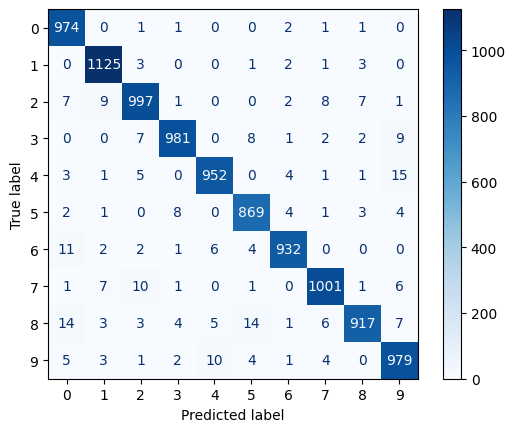

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(test_y, y_predict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

graph of accuracy and loss

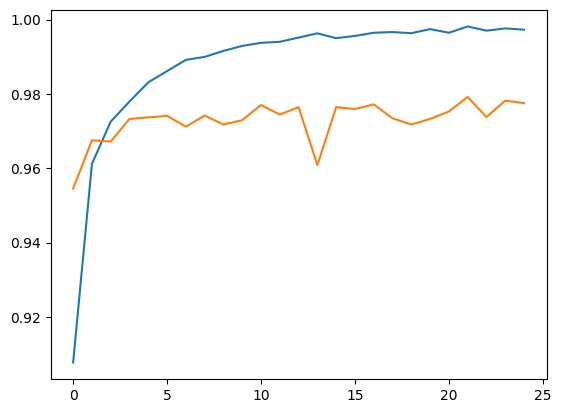

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

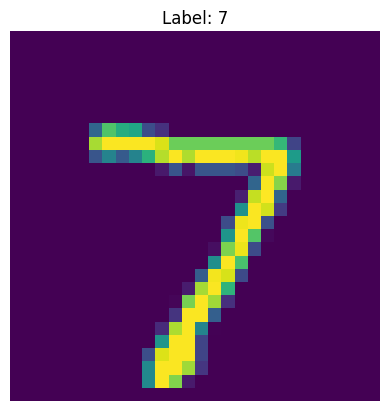

In [ ]:

plt.imshow(X_test[0])
plt.title(f'Label: {y_predict[0]}')
plt.axis('off')  # Optionally turn off the axis
plt.show()

In [ ]:
# predicted value by model
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 45ms/step


array([7])